Extraigo los datos de los archivos de descarga:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def extraer_marca(linea):
    ultimo_valor_str = linea.split("\t")[-1]
    ultimo_valor_str = ultimo_valor_str.replace(",", ".")
    ultimo_valor = float(ultimo_valor_str)
    return ultimo_valor


def extraer_periodo_frecuencia(linea):
    valores = linea.split("\t")
    periodo = valores[0]
    periodo = periodo.replace(",", ".")
    periodo = float(periodo)
    frecuencia = valores[1]
    frecuencia = frecuencia.replace(",", ".")
    frecuencia = float(frecuencia)
    return periodo, frecuencia


def convertir_descarga_dataframe(ruta_archivo):
    # Leer el archivo línea por línea
    with open(ruta_archivo, "r", encoding="latin-1") as f:
        lineas = f.readlines()

    marca_1 = extraer_marca(lineas[0])
    marca_2 = extraer_marca(lineas[2])

    periodo, frecuencia = [], []
    for i in range(5, len(lineas)):
        periodo_aux, frecuencia_aux = extraer_periodo_frecuencia(lineas[i])
        periodo.append(periodo_aux)
        frecuencia.append(frecuencia_aux)

    descarga = pd.DataFrame({"Periodo": periodo, "Frecuencia": frecuencia})

    # Encontrar las posiciones de las marcas
    pos_1 = descarga["Periodo"].ge(marca_1).idxmax()
    pos_2 = descarga["Periodo"].ge(marca_2).idxmax()

    # Recortar el DataFrame entre las marcas
    descarga = descarga.iloc[pos_1 : pos_2 + 1]

    return descarga

In [2]:
descarga_1 = convertir_descarga_dataframe("datos/descarga_1.txt")
descarga_2 = convertir_descarga_dataframe("datos/descarga_2.txt")
descarga_3 = convertir_descarga_dataframe("datos/descarga_3.txt")
descarga_4 = convertir_descarga_dataframe("datos/descarga_4.txt")
descarga_variable = convertir_descarga_dataframe("datos/descarga_variable.txt")

In [3]:
def calcular_promedio_frecuencia(descarga):
    promedio = descarga["Frecuencia"].mean()
    return promedio

promedio_1 = calcular_promedio_frecuencia(descarga_1)
promedio_2 = calcular_promedio_frecuencia(descarga_2)
promedio_3 = calcular_promedio_frecuencia(descarga_3)
promedio_4 = calcular_promedio_frecuencia(descarga_4)
promedio_variable = calcular_promedio_frecuencia(descarga_variable)


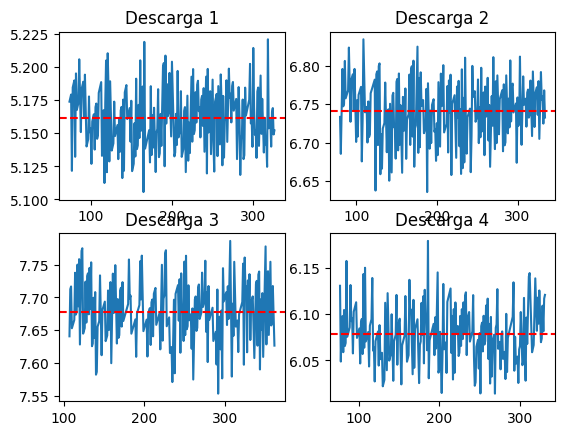

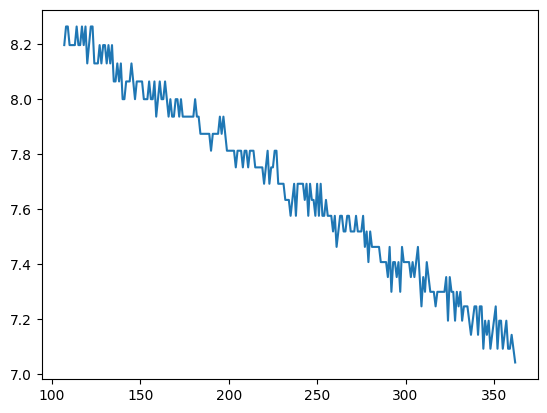

In [4]:
from scipy.optimize import curve_fit


def modelo_lineal(x, a, b):
    return a * x + b


def error_promedio(descarga):
    popt, pcov = curve_fit(modelo_lineal, descarga["Periodo"], descarga["Frecuencia"])
    a, b = popt
    y_modelo = modelo_lineal(descarga["Periodo"], a, b)
    error = np.std(descarga["Frecuencia"] - y_modelo)
    return error, y_modelo


error_1, y_modelo_1 = error_promedio(descarga_1)
error_2, y_modelo_2 = error_promedio(descarga_2)
error_3, y_modelo_3 = error_promedio(descarga_3)
error_4, y_modelo_4 = error_promedio(descarga_4)

fig, axs = plt.subplots(2, 2)
axs[0,0].plot(descarga_1["Frecuencia"]-y_modelo_1 + promedio_1)
axs[0,0].axhline(y=promedio_1, color="r", linestyle="--")
axs[0,0].set_title("Descarga 1")

axs[0,1].plot(descarga_2["Frecuencia"]-y_modelo_2 + promedio_2)
axs[0,1].axhline(y=promedio_2, color="r", linestyle="--")
axs[0,1].set_title("Descarga 2")

axs[1,0].plot(descarga_3["Frecuencia"]-y_modelo_3 + promedio_3)
axs[1,0].axhline(y=promedio_3, color="r", linestyle="--")
axs[1,0].set_title("Descarga 3")

axs[1,1].plot(descarga_4["Frecuencia"]-y_modelo_4 + promedio_4)
axs[1,1].axhline(y=promedio_4, color="r", linestyle="--")
axs[1,1].set_title("Descarga 4")
plt.show()

plt.figure()
plt.plot(descarga_3["Frecuencia"])
plt.show()

Ahora analizo la parte del volumen de agua

In [5]:
volumen = 122.0867 # kg masmenos 800g
error_volumen = 0.8 # kg

tiempo_1 = 49.27 # s masmenos 800ms
tiempo_2 = 37.86 # s  
tiempo_3 = 33.26 # s
tiempo_4 = 41.96 # s
tiempo_variable = 52.41 # s
error_tiempo = 0.8 # s

caudal_1 = volumen / tiempo_1
caudal_1_error = np.sqrt((error_volumen / tiempo_1) ** 2 + (volumen * error_tiempo / tiempo_1 ** 2) ** 2)
caudal_2 = volumen / tiempo_2
caudal_2_error = np.sqrt((error_volumen / tiempo_2) ** 2 + (volumen * error_tiempo / tiempo_2 ** 2) ** 2)
caudal_3 = volumen / tiempo_3
caudal_3_error = np.sqrt((error_volumen / tiempo_3) ** 2 + (volumen * error_tiempo / tiempo_3 ** 2) ** 2)
caudal_4 = volumen / tiempo_4
caudal_4_error = np.sqrt((error_volumen / tiempo_4) ** 2 + (volumen * error_tiempo / tiempo_4 ** 2) ** 2)
caudal_variable = volumen / tiempo_variable
caudal_variable_error = np.sqrt((error_volumen / tiempo_variable) ** 2 + (volumen * error_tiempo / tiempo_variable ** 2) ** 2)

Ahora ploteo tipo scatter frecuencia_mean vs caudal

a = 0.0339 ± 0.0065
b = 0.4734 ± 0.0011


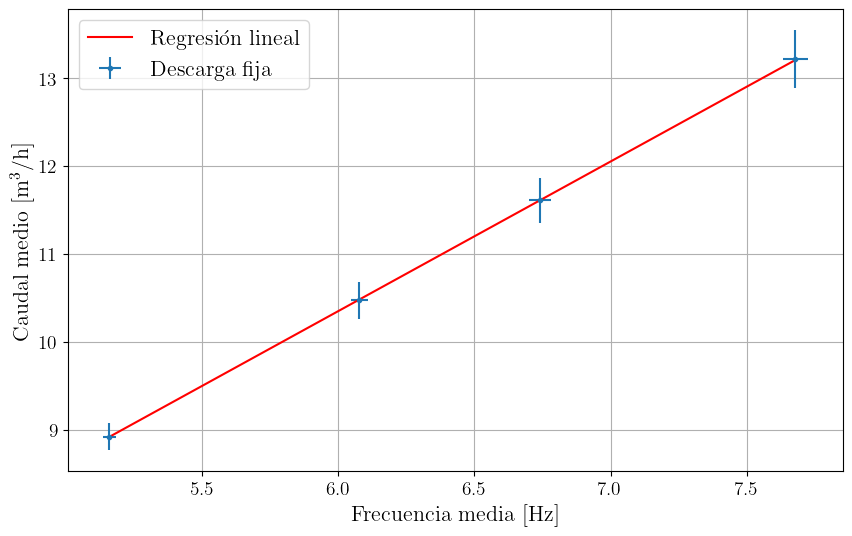

[2.47791151 3.22468833 3.67067649 2.90959724]
[0.04338683 0.07134038 0.0915082  0.05865866]
[5.16147039 6.74114102 7.67848407 6.07907457]
[0.0231568  0.0389399  0.04444006 0.03021376]


In [9]:
caudal = np.array([caudal_1, caudal_2, caudal_3, caudal_4])
caudal_error = np.array(
    [caudal_1_error, caudal_2_error, caudal_3_error, caudal_4_error]
)
promedio = np.array([promedio_1, promedio_2, promedio_3, promedio_4])
promedio_error = np.array([error_1, error_2, error_3, error_4])

import scipy.odr as odr


# Definir el modelo lineal
def linear_func(B, x):
    return B[0] + B[1] * x  # B[0] = a, B[1] = b


# Configurar el modelo ODR
model = odr.Model(linear_func)
data = odr.RealData(
    promedio, caudal, sx=promedio_error, sy=caudal_error
)
odr_instance = odr.ODR(data, model, beta0=[0, 1])  # Valores iniciales [a, b]

# Ejecutar la regresión
output = odr_instance.run()

# Obtener parámetros ajustados y sus errores
a, b = output.beta
a_err, b_err = output.sd_beta

# Mostrar resultados
print(f"a = {a:.4f} ± {a_err:.4f}")
print(f"b = {b:.4f} ± {b_err:.4f}")

# Graficar los datos con la recta ajustada
x_fit = np.linspace(min(promedio), max(promedio), 100)
y_fit = a + b * x_fit

#--------------------
# from scipy.optimize import curve_fit

# # Definir la función de ajuste (recta: y = Ax + B)
# def linear_model(x, A, B):
#     return A * x + B

# # Ajuste de la regresión lineal con errores en y
# popt, pcov = curve_fit(linear_model, promedio, caudal)

# # Parámetros ajustados
# A_opt, B_opt = popt

# # Errores de los parámetros (raíces de la diagonal de la matriz de covarianza)
# A_err, B_err = np.sqrt(np.diag(pcov))

# print(f"A = {A_opt:.3f} ± {A_err:.3f}")
# print(f"B = {B_opt:.3f} ± {B_err:.3f}")



# %matplotlib widget
plt.rcParams.update({
    "text.usetex": True,  # Usa LaTeX para el texto
    "font.family": "serif",  # Fuente tipo serif (similar a LaTeX)
    "font.serif": ["Computer Modern Roman"],  # Usa Computer Modern
    "axes.labelsize": 16,  # Tamaño de etiquetas de ejes
    "font.size": 16,  # Tamaño general de fuente
    "legend.fontsize": 16,  # Tamaño de fuente en la leyenda
    "xtick.labelsize": 14,  # Tamaño de fuente en los ticks de x
    "ytick.labelsize": 14,  # Tamaño de fuente en los ticks de y
})
# Ahora ploteo tipo scatter frecuencia_mean vs caudal
plt.figure(figsize=(10, 6))
plt.errorbar(
    promedio,
    caudal*3.6,
    xerr=promedio_error,
    yerr=caudal_error*3.6,
    fmt="o",
    label="Descarga fija",
    markersize=3,
)
# plt.scatter(promedio_variable, caudal_variable, label="Descarga variable")
plt.plot(x_fit, y_fit*3.6, label=f"Regresión lineal", color="red")
# plt.plot(x_fit, linear_model(x_fit, A_opt, B_opt), label=f"Recta ajustada: y = {A_opt:.3f}x + {B_opt:.3f}")
# plt.title("Caudal vs Frecuencia media")
plt.xlabel("Frecuencia media [Hz]")
plt.ylabel("Caudal medio [m$^3$/h]")
plt.legend()
plt.grid()
plt.show()

print(caudal)
print(caudal_error)
print(promedio)
print(promedio_error)

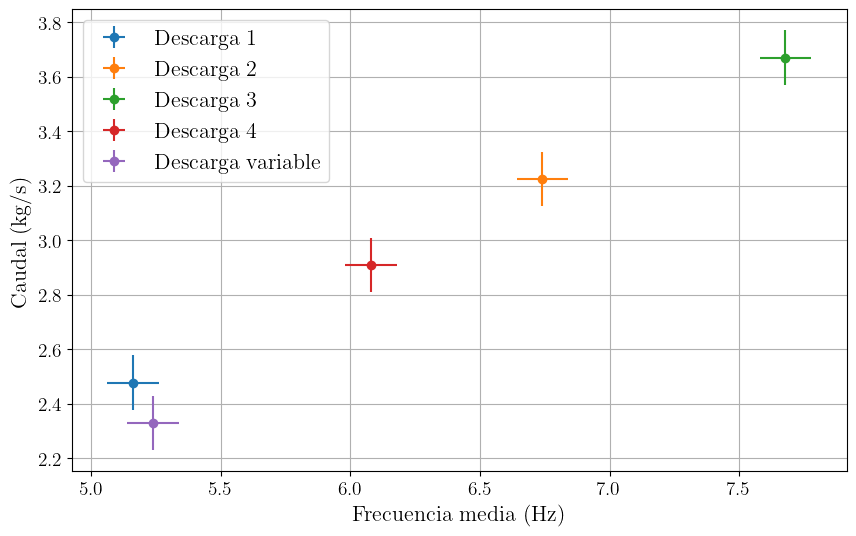

In [7]:
# Invento incertezas en los datos de forma provisoria
error_caudal = 0.1
error_frecuencia = 0.1

# Ploteo con barras de error
plt.figure(figsize=(10, 6))
plt.errorbar(
    promedio_1,
    caudal_1,
    xerr=error_frecuencia,
    yerr=error_caudal,
    fmt="o",
    label="Descarga 1",
)
plt.errorbar(
    promedio_2,
    caudal_2,
    xerr=error_frecuencia,
    yerr=error_caudal,
    fmt="o",
    label="Descarga 2",
)
plt.errorbar(
    promedio_3,
    caudal_3,
    xerr=error_frecuencia,
    yerr=error_caudal,
    fmt="o",
    label="Descarga 3",
)
plt.errorbar(
    promedio_4,
    caudal_4,
    xerr=error_frecuencia,
    yerr=error_caudal,
    fmt="o",
    label="Descarga 4",
)
plt.errorbar(
    promedio_variable,
    caudal_variable,
    xerr=error_frecuencia,
    yerr=error_caudal,
    fmt="o",
    label="Descarga variable",
)
plt.xlabel("Frecuencia media (Hz)")
plt.ylabel("Caudal (kg/s)")
plt.legend()
plt.grid()
plt.show()

Ajuste: y = 2.132x + -0.193


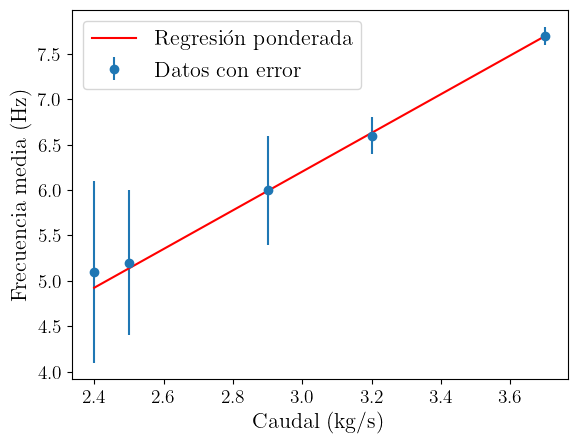

Ajuste: y = 2.019x + 0.183


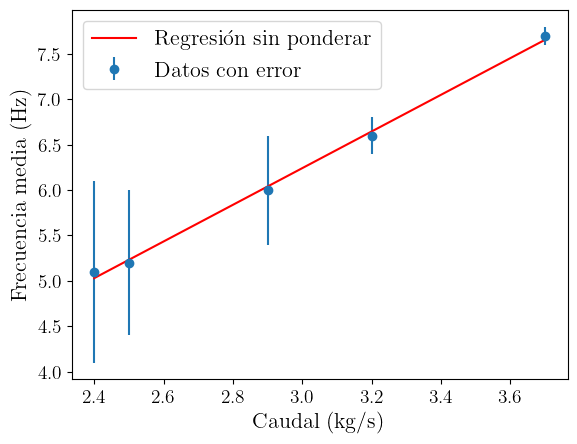

NameError: name 'sm' is not defined

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos (ejemplo)
x = np.array([2.4, 2.5, 2.9, 3.2, 3.7])  # Caudal
y = np.array([5.1, 5.2, 6.0, 6.6, 7.7])  # Frecuencia media
sigma_y = np.array([1, 0.8, 0.6, 0.2, 0.1])  # Incertidumbre en y

# Definir función lineal
def f(x, a, b):
    return a * x + b

# Ajuste con pesos (1/sigma_y**2)
popt, pcov = curve_fit(f, x, y, sigma=sigma_y, absolute_sigma=True)

# Parámetros ajustados
a_fit, b_fit = popt
print(f"Ajuste: y = {a_fit:.3f}x + {b_fit:.3f}")

# Gráfico
plt.errorbar(x, y, yerr=sigma_y, fmt="o", label="Datos con error")
x_fit = np.linspace(min(x), max(x), 100)
plt.plot(x_fit, f(x_fit, *popt), label="Regresión ponderada", color="red")
plt.xlabel("Caudal (kg/s)")
plt.ylabel("Frecuencia media (Hz)")
plt.legend()
plt.show()

# Regresion sin ponderar

# Ajuste sin pesos
popt, pcov = curve_fit(f, x, y)

# Parámetros ajustados
a_fit, b_fit = popt
print(f"Ajuste: y = {a_fit:.3f}x + {b_fit:.3f}")

# Gráfico
plt.errorbar(x, y, yerr=sigma_y, fmt="o", label="Datos con error")
x_fit = np.linspace(min(x), max(x), 100)
plt.plot(x_fit, f(x_fit, *popt), label="Regresión sin ponderar", color="red")
plt.xlabel("Caudal (kg/s)")
plt.ylabel("Frecuencia media (Hz)")
plt.legend()
plt.show()

# Modelo WLS
X = sm.add_constant(x)  # Agregar término independiente
model = sm.WLS(y, X, weights=1/sigma_y**2)  # Pesos = 1/varianza
results = model.fit()
print(results.summary())

# Coeficientes corregidos
b_fit, a_fit = results.params  # results.params[0] = intercepto, results.params[1] = pendiente
print(f"Ajuste WLS: y = {a_fit:.3f}x + {b_fit:.3f}")

# Gráfico
plt.figure(figsize=(6, 5))
plt.errorbar(x, y, yerr=sigma_y, fmt="o", label="Datos con error")

# Línea de regresión corregida
x_fit = np.linspace(min(x), max(x), 100)
plt.plot(x_fit, a_fit*x_fit + b_fit, label="Regresión WLS", color="red")

plt.xlabel("Caudal (kg/s)")
plt.ylabel("Frecuencia media (Hz)")
plt.legend()
plt.show()

